# Midterm Project - NPS Data Analysis



## Description of Problem
Make School’s Summer Academy typically lasts for 8 weeks, although this can vary by location.
Management wants to make sure that students continue to be satisfied with their experience as the program scales. 
Every week, students are given a survey asking their satisfaction with the program in the form of a Net Promoter Score (NPS) question, which is a tool commonly used to measure customer loyalty and promotion. 

You have been given data from Summer Academy in 2016 (optional) and 2017 (mandatory). Download the data [here](https://drive.google.com/file/d/1IMb2HWKoxkayxWe9j_5x2DkJZriWnNDN/view).

#### You’ve seen NPS before if you’ve been asked a question like:
    “On a scale of 1 to 10, how likely are you to recommend [X] to a friend or colleague?”

- Clean and investigate Make School NPS data to find interesting and actionable trends that help inform decision-makers.

- You should create a data dictionary that describes what each column’s possible values mean.

- Create a presentation in a Jupyter Notebook using data visualizations and other techniques that allow non-technical team members to understand your findings.



### Background on NPS

#### NPS segments all responses between 1 and 10 into three categories based on their sentiment:
- Promoter (9 – 10)
- Passive (7 – 8)
- Detractor (1 – 6)

#### To calculate NPS, companies follow these steps:
1. Segment all responses into Promoter, Passive, and Detractor categories.
2. Calculate the percentage of responses in each category out of the total number of responses to the survey.
3. Subtract the Detractors percentage from the Promoters percentage. This is the NPS.

In other words, NPS can be calculated with this equation:
#### NPS = ( (Promoters - Detractors) / (Promoters + Passives + Detractors) ) * 100

NPS can range from –100 (if everyone is a detractor) to +100 (if everyone is a promoter).

For more detailed information on NPS, [read this article](https://blog.capterra.com/what-is-nps-net-promoter-score-explained/).


## All Are Favorite Friends (Imports)

In [1]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

# Dataset from above
df = pd.read_csv('Datasets/Student Feedback Surveys-Superview.csv').set_index('ID')
df.columns

Index(['Location', 'Track', 'Week', 'Rating (Num)', 'Schedule Pacing'], dtype='object')

### Questions to Consider Answering
In this scenario, you’ve just been given access to this data from your boss, with the instructions to:

    “See if you can find anything in here that can help the business.”
    – This is a very broad set of instructions.

In order to complete this task you should consider finding answers to the following questions:


- How many more promoters are there than detractors across our 2017 data?


- Which track boasts the best promoter-to-detractor ratio?


- Does the student experience get better the longer that they are enrolled at the Summer Academy?
- Does student satisfaction vary by location?


- What are things we could find here that could “help the business”?
- What sorts of information does this dataset contain?
- What kinds of questions might we be able to answer with this data?
- What kinds of questions can’t we answer with this data?
- What sorts of information might be actionable?

In [2]:
# Winging We gotta clean the data so it's easier to work with later

"""Create new column as NPS Score 
    Promoter (9 – 10)
    Passive (7 – 8)
    Detractor (1 – 6)"""

df["Rating (Num)"] = df["Rating (Num)"].apply(
    lambda x: int(x) if (x != "#ERROR!") else 5)

df['NPS'] = df['Rating (Num)'].map(
    {1: 'det', 2: 'det', 3: 'det',
    4: 'det', 5: 'det', 6: 'det',
    7: 'pas', 8: 'pas', 9: 'pro', 10: 'pro'} ).astype(str)

In [3]:
print(df['NPS'].value_counts())
df

pro    760
pas    569
det    122
nan      2
Name: NPS, dtype: int64


,Location,Track,Week,Rating (Num),Schedule Pacing,NPS
ID,,,,,,
134,San Francisco,"Apps, Explorer",Week 1,3,Just right,det
36,Los Angeles,Apps,Week 1,4,A little too fast,det
117,San Francisco,Games,Week 1,4,Way too slow,det
253,NaN,NaN,Week 2,4,A little too fast,det
350,New York City,"Apps, Explorer",Week 1,4,Just right,det
...,...,...,...,...,...,...
1495,New York City,"Apps, Explorer",Week 7,10,Just right,pro
1496,New York City,"Apps, Explorer",Week 7,8,Just right,pas
1497,New York City,Apps,Week 7,10,Just right,pro


## 1. How many more promoters are there than detractors across our 2017 data?

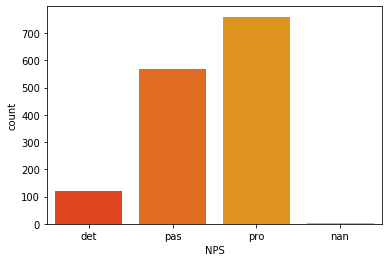

In [4]:
sns.countplot(x='NPS', palette='autumn', data=df)

In [5]:
Promoters = len(df[df['NPS']=='pro'])
Passives = len(df[df['NPS']=='pas'])
Detractors = len(df[df['NPS']=='det'])

HMM = Promoters - Detractors
NPS = ( (Promoters - Detractors) / (Promoters + Passives + Detractors) ) * 100

print('Num promoters - Num detractors:', Promoters, '-', Detractors, '=', HMM,
      '\nThere are', HMM, 'more promoters than detractors')
print('Overall NPS Score: %.4f' %NPS)

Num promoters - Num detractors: 760 - 122 = 638 
There are 638 more promoters than detractors
Overall NPS Score: 43.9697


### Here we can see there are 638 more promoters than detractors,
### Giving us and overall NPS Score of 43.97%

### 2. Which track boasts the best promoter-to-detractor ratio?

In [6]:
# NPS SCORE FOR A TRACK
def Calc_NPS_SCORE(Column, scores):
    Promoters = dict(df[df[Column] == scores]['NPS'].value_counts())['pro']
    Passives = dict(df[df[Column] == scores]['NPS'].value_counts())['pas']
    if 'det' not in dict(df[df[Column] == scores]['NPS'].value_counts()):
        Detractors = 0
    else:
        Detractors = dict(df[df[Column] == scores]['NPS'].value_counts())['det']
    
    HMM = Promoters - Detractors
    NPS = ( (Promoters - Detractors) / (Promoters + Passives + Detractors) ) * 100
    
    print('NPS SCORE FOR [', scores, ']',
          dict(df[df[Column] == scores]['NPS'].value_counts())) 
    print('Num promoters - Num detractors:',
          Promoters, '-', Detractors, '=', HMM, 'more promoters than detractors')
    print('Overall NPS Score: %.4f' %NPS)
    print('------------')
    
    return NPS

In [7]:
track_nps = np.array([Calc_NPS_SCORE('Track', 'Apps'),
                     Calc_NPS_SCORE('Track', 'Apps, Explorer'),
                     Calc_NPS_SCORE('Track', 'Games'),
                     Calc_NPS_SCORE('Track', 'VR'),
                     Calc_NPS_SCORE('Track', 'Games, Explorer')])

NPS SCORE FOR [ Apps ] {'pro': 438, 'pas': 355, 'det': 77, 'nan': 1}
Num promoters - Num detractors: 438 - 77 = 361 more promoters than detractors
Overall NPS Score: 41.4943
------------
NPS SCORE FOR [ Apps, Explorer ] {'pas': 109, 'pro': 91, 'det': 24}
Num promoters - Num detractors: 91 - 24 = 67 more promoters than detractors
Overall NPS Score: 29.9107
------------
NPS SCORE FOR [ Games ] {'pro': 133, 'pas': 66, 'det': 9}
Num promoters - Num detractors: 133 - 9 = 124 more promoters than detractors
Overall NPS Score: 59.6154
------------
NPS SCORE FOR [ VR ] {'pro': 46, 'pas': 12, 'det': 2}
Num promoters - Num detractors: 46 - 2 = 44 more promoters than detractors
Overall NPS Score: 73.3333
------------
NPS SCORE FOR [ Games, Explorer ] {'pro': 31, 'pas': 12}
Num promoters - Num detractors: 31 - 0 = 31 more promoters than detractors
Overall NPS Score: 72.0930
------------


#### From above we can compare the NPS Score (Promoters vs Detractors ratio) of each track, 
Confirming that VR has a Higher NPS around ~73.33% compared to Apps with roughly ~41.49%

In [8]:
track_data = np.array(df.Track)
track_dict = dict(pd.Series(track_data).value_counts())
track_dict

{'Apps': 871,
 'Apps, Explorer': 224,
 'Games': 208,
 'VR': 60,
 'Games, Explorer': 43}

In [9]:
sentiment_dict = df['NPS'].value_counts()
sentiment_dict

pro    760
pas    569
det    122
nan      2
Name: NPS, dtype: int64

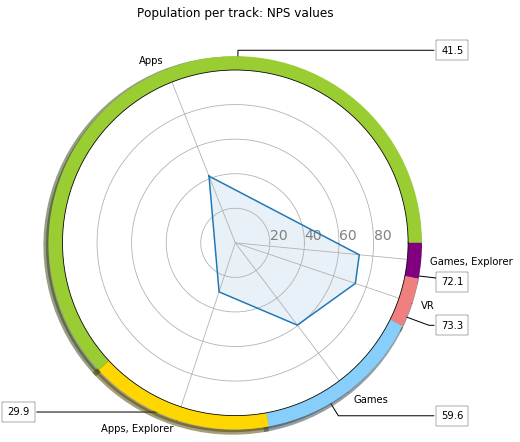

In [10]:
# CREDIT GOES TO: GENJI TAPIA & https://python-graph-gallery.com/

# Set data variables
dfv = pd.DataFrame({
'group': ['NPS of tracks'],
'Apps': track_nps[0],
'Apps, Explorer': track_nps[1],
'Games': track_nps[2],
'VR': track_nps[3],
'Games, Explorer': track_nps[4]
})
categories=list(dfv)[1:]


# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=dfv.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

#calculate the middle point of each of the pie parts 
total = sum(track_dict.values())
angles = []
offset = 0
for value in track_dict.values():
    angle = (value / total)*6.2831853071796
    offset += angle/2  #get the middle
    angles.append(offset)
    offset += angle/2  #return the remainder to the offset
angles += angles[:1]  #close the loop

#----------------------------SPIDER GRAPH BASE
# Initialise the spider plot at a point inside the pie
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), subplot_kw=dict(polar=True, zorder=1))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

#----------------------------SPIDER GRAPH DRAWS
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], color='black', size=0)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([20,40,60,80], ["20", "40", "60", "80"], color="grey", size=14)
plt.ylim(0,100)
# Plot data
ax.plot(angles, values, linewidth=1.5, linestyle='solid')
# Fill area
ax.fill(angles, values, 'p', alpha=0.1)

#----------------------------PIE CHART VARS
sizes = track_dict.values()
labels = track_dict.keys()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'purple']
explode = (0, 0, 0, 0, 0)

#----------------------------PIE CHART
ax2 = fig.add_subplot(111, label="pie axes", zorder=0)
wedges, d = ax2.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, wedgeprops = {'linewidth': 5},
            radius=1.35, startangle=0, labeldistance=1.05)

#----------------------------ANNOTATE
recipe = np.round_(track_nps,1)
bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.32)
kw2 = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):  #using pie wedges to math our points
    ang = (p.theta2 - p.theta1)/2.5 + p.theta1  #change /2 to shift left/right
    y = np.sin(np.deg2rad(ang-5))  #offcenter the angle of lines futher
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {1: "right", -1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw2["arrowprops"].update({"connectionstyle": connectionstyle})
    ax2.annotate(recipe[i], xy=(x, y), xytext=(1.65*np.sign(x), 1.4*y), horizontalalignment=horizontalalignment, **kw2)

#-----------------------------DRAW
ax.set_title("Population per track: NPS values\n\n")
ax2.set(aspect="equal")

plt.show()

# #-----------------------------Print NPS
# print (f'Average NPS: {track_nps.mean()}  [NOT A REAL NUMBER] ')
# print (f'  Total NPS: {Calc_NPS_SCORE( sentiment_dict,  )}')

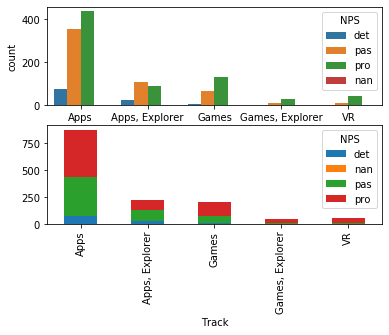

In [11]:
f,(ax_count, ax_stack) = plt.subplots(2,
            gridspec_kw={"height_ratios": (.5, .5)})

df.groupby(['Track'])['NPS'].value_counts().unstack().plot(
            kind='bar', stacked=True, ax=ax_stack)
sns.countplot(x='Track', hue="NPS",
            data=df.sort_values('Track'), ax=ax_count)
plt.show()

# Here we can visually see the separation of each NPS segment per track

In [12]:
pd.crosstab(df['Track'], df['NPS'], normalize='index', margins=True)

NPS,det,nan,pas,pro
Track,,,,
Apps,0.088404,0.001148,0.407577,0.502870
"Apps, Explorer",0.107143,0.000000,0.486607,0.406250
Games,0.043269,0.000000,0.317308,0.639423
"Games, Explorer",0.000000,0.000000,0.279070,0.720930
VR,0.033333,0.000000,0.200000,0.766667
All,0.079659,0.000711,0.394026,0.525605


In [13]:
pd.crosstab(df["Schedule Pacing"], df["Track"])

Track,Apps,"Apps, Explorer",Games,"Games, Explorer",VR
Schedule Pacing,,,,,
A little too fast,197,43,21,5,10
A little too slow,58,9,25,0,5
Just right,603,165,158,38,45
Way too fast,13,7,1,0,0
Way too slow,0,0,3,0,0


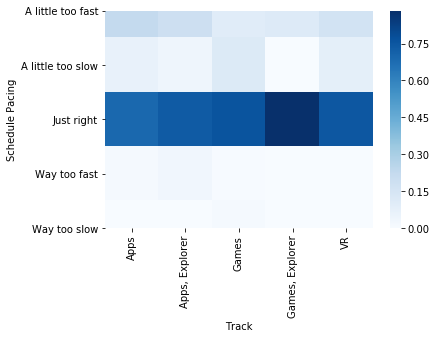

In [14]:
plt.show(sns.heatmap(pd.crosstab(
    df["Schedule Pacing"], df["Track"], normalize='columns'), cmap="Blues"))

## 3. Does student satisfaction vary by location?
## Simply put, Yes: Student satisfaction varies by location

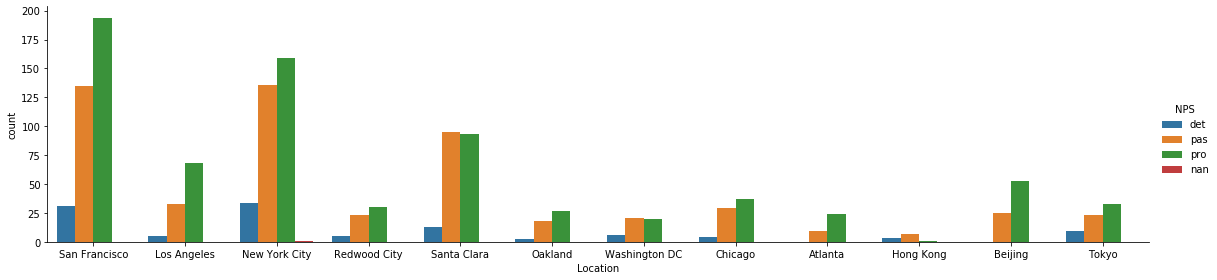

In [15]:
# Assuming that NPS score stands for statisfaction If we compare 4 random locations for their 
sns.catplot(x="Location", hue="NPS",
            data=df, kind="count",
            height=4, aspect=4);

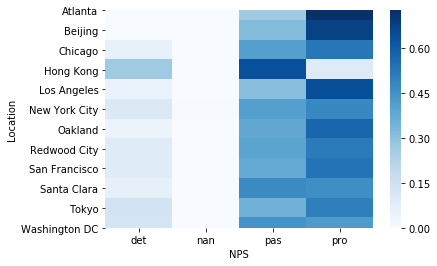

In [16]:
locations = pd.crosstab(df["Location"], df["NPS"], normalize='index')
plt.show(sns.heatmap(locations, cmap="Blues"))

### 4. Does the student experience get better the longer that they are enrolled at the Summer Academy?

In [17]:
df["Schedule Pacing"].value_counts()

Just right           1034
A little too fast     289
A little too slow     100
Way too fast           23
Way too slow            4
Name: Schedule Pacing, dtype: int64

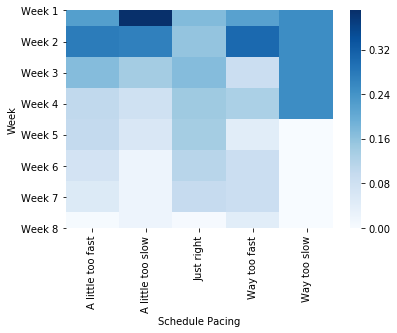

In [18]:
sns.heatmap(pd.crosstab(
    df["Week"], df["Schedule Pacing"], normalize='columns'), cmap="Blues")

#### In the beginning the overal pacing was either a little slow or was way to slow
#### Then latter in the course it comes closer to being just right of a pacing

In [19]:
pd.crosstab(df["Week"], df["Rating (Num)"])

Rating (Num),0,1,2,3,4,5,6,7,8,9,10
Week,,,,,,,,,,,
Week 1,0,0,0,1,6,9,12,40,91,61,68
Week 2,1,0,0,2,2,7,12,34,82,76,61
Week 3,0,1,0,1,0,7,13,22,64,69,66
Week 4,0,0,0,2,3,6,8,25,49,55,45
Week 5,1,0,1,0,2,4,7,22,45,45,52
Week 6,0,0,1,1,0,1,5,18,41,34,43
Week 7,0,1,0,1,0,4,2,15,19,41,37
Week 8,0,0,0,0,0,0,0,1,1,3,4


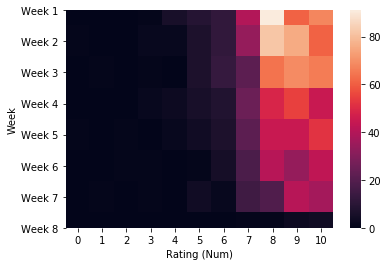

In [20]:
sns.heatmap(pd.crosstab(df["Week"], df["Rating (Num)"]))

## Question Summary

### 1: How many more promoters are there than detractors across our 2017 data?
In Problem one we can see there are 641 more promoters than detractors, Giving us and overall NPS Score of 44.27%

### 2: Which track boasts the best promoter-to-detractor ratio?
In problem two we compared the NPS Score (Promoters vs Detractors ratio) of each track, and confirmed that VR has a Higher NPS score around ~73.33% compared to Apps with roughly ~41.49%

### 3: Does student satisfaction vary by location?
Simply put, Yes: Student satisfaction varies by location


### 4: Does the student experience get better the longer that they are enrolled at the Summer Academy?
##### Yes and No, heres why:
Yes, In the beginning the overal pacing was either a little slow or was way to slow
Then latter in the course it comes closer to being just right of a pacing. As well,
No, In the beginning the overal rating was higher 8-10 but as the course continued
those values drop out.



# Conclusions
* Expand the Atlanta, LA, and Beijing branches
* Shut down the Hong Kong branch
* Speed up the pace of the Apps track a little bit everywhere except Atlanta and Redwood City
* Focus on improving the curriculum of Apps and Apps, Explorer
* Keep an eye on Week 3-4 to ensure people don't lose interest

In [21]:
import quandl

ModuleNotFoundError: No module named 'quandl'